在之前（linear_model.ipynb）中，我们都是人工构建loss函数以及grad函数和update函数，实际上Pytorch已经有一套成熟的函数供我们调用。

在使用之前，我们需要明确我们每次训练数据的流程。

1.prepare dataset<br>
2.Design model using class<br>
3.Construct loss and optimizer<br>
4.Trainging cycle<br>

1.如下的方法为mini-batch的数据集风格，但是由于只有三组数据，所以就直接写成 3 $\times$ 1 的矩阵形式<br>
并且这里的x和y都应该是tensor，而不是scaler或者其他形式

In [3]:
import torch

x_data = torch.tensor([[1.0],[2.0],[3.0]])
y_data = torch.tensor([[2.0],[4.0],[6.0]])

2.构建函数<br>

在PyTorch中，我们不需要手工的计算导数，重要的是通过Tensor之间的计算直接狗仔计算图。<br>
这其中的关键就是确定w和b的大小。而确定w和b的维度又要知道x（input）和y_pred（output）的维度。<br>
如下为定义model的标注格式，以后都按照这种方法定义。


In [4]:
class LinearModul(torch.nn.Module):
    #构建函数
    def __init__(self):
        #父类，不用管，just do it
        super(LinearModul,self).__init__()
        #定义了一个线性层，作为class的实例变量，这样每个实例都有自己独立的线性层。
        #括号中的两个1分别表示输入feature的数量和输出feature的数量。
        #Linear函数默认计算y=wx+b
        self.linear = torch.nn.Linear(1,1)

    def forward(self,x):
        #在 forward 方法中，通过 self 访问实例变量 linear，并对输入 x 进行计算。
        #相当于计算y_pred=wx+b
        y_pred = self.linear(x)
        return y_pred
model = LinearModul()


3. Constuct Loss and Optimizer

接下来就要构建Loss function和优化函数了。<br>
这里我们使用的是MSEloss函数，直接调用即可。<br>
优化函数有很多，这里先用SGD<br>
优化器：<br>
*torch.optim.Adagrad
*torch.optim.Adam
*torch.optim.Adamax
*torch.optim.ASGD
*torch.optim.LBFGS
*torch.optim.RMSprop
*torch.optim.Rprop
*torch.optim.SGD

In [5]:
#不计算均值
criterion = torch.nn.MSELoss(size_average=False)
#检查model所有成员，权重加入优化训练，learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

/opt/miniconda3/envs/PyTorch/lib/python3.12/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


4. Training cycle

通常的顺序为：
*y_pred
*loss
*clear
*backward
*update

In [ ]:
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss.item())
    
    #clear
    optimizer.zero_grad()
    #backward
    loss.backward()
    #update
    optimizer.step()


接下来让我们尝试运行如上所示的所有代码。

w=  1.8818016052246094
b=  0.2686927318572998
Predict(after training) epoch= 100 when x = 4, y_pred= tensor([7.7959], grad_fn=<ViewBackward0>)


<function matplotlib.pyplot.show(close=None, block=None)>

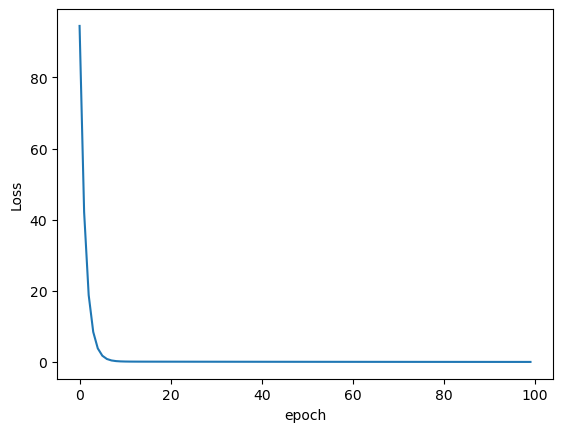

In [37]:
import torch
import matplotlib.pyplot as plt

x_data = torch.tensor([[1.0],[2.0],[3.0]])
y_data = torch.tensor([[2.0],[4.0],[6.0]])

class LinearModul(torch.nn.Module):
    def __init__(self):
        super(LinearModul,self).__init__()
        self.linear = torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModul()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

loss_value = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    loss_value.append(loss.item())
    #print(epoch,loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#Output weight and bias
print('w= ' ,model.linear.weight.item())
print('b= ', model.linear.bias.item())

#Test model
x_test = torch.tensor([4.0])
y_test = model(x_test)
print('Predict(after training)','epoch=',epoch+1,'when x = 4, y_pred=',y_test)

plt.plot(range(100),loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show